Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChains
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

CmdStan uses a tmp directory to store the output of cmdstan

In [3]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

In [4]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


### Snippet 4.21

Sample 20 random heights

In [5]:
n = size(df2, 1)
selected_ind = sample(1:n, 20, replace=false);
df3 = df2[selected_ind, :];

### Snippet 4.22

Generate approximate probabilities

In [6]:
struct Post
  mu::Float64
  sigma::Float64
  ll:: Float64
  prod::Float64
  prob::Float64
end

mu_list = repeat(range(140, 170, length=200), 200);
sigma_list = repeat(range(4, 20, length=200), inner=200);

ll = zeros(40000);
for i in 1:40000
    d1 = Normal(mu_list[i], sigma_list[i])
    ll[i] = sum(log.(pdf.(d1, df3[:height])))
end

d2 = Normal(178.0, 20.0)
d3 = Uniform(0, 50)
prod = ll + log.(pdf.(d2, mu_list)) + log.(pdf.(d3, sigma_list))
prob = exp.(prod .- maximum(prod))
post = DataFrame(mu=mu_list, sigma=sigma_list, ll=ll, prod=prod, prob=prob)
first(post, 10)

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,140.0,4.0,-206.92,-216.552,3.31356e-61
2,140.151,4.0,-204.266,-213.883,4.77975e-60
3,140.302,4.0,-201.639,-211.242,6.70121e-59
4,140.452,4.0,-199.041,-208.63,9.13144e-58
5,140.603,4.0,-196.472,-206.047,1.20938e-56
6,140.754,4.0,-193.931,-203.492,1.55677e-55
7,140.905,4.0,-191.418,-200.965,1.94771e-54
8,141.055,4.0,-188.934,-198.467,2.36843e-53
9,141.206,4.0,-186.478,-195.997,2.79921e-52


Sample post

In [7]:
samples = post[sample(1:size(post, 1), Weights(post[:prob]), 10000, replace=true), :]

,mu,sigma,ll,prod,prob
,Float64,Float64,Float64,Float64,Float64
1,152.965,6.65327,-69.4188,-78.029,0.478666
2,156.131,10.7538,-71.1236,-79.5481,0.104778
3,155.678,9.38693,-69.863,-78.3126,0.360471
4,153.116,6.65327,-69.3424,-77.9431,0.521584
5,152.814,7.9397,-69.1026,-77.7222,0.650495
6,151.457,10.1106,-70.9151,-79.6225,0.097269
7,155.678,8.82412,-69.5081,-77.9576,0.51407
8,156.432,10.0302,-70.6407,-79.0488,0.172628
9,155.528,7.9397,-69.1096,-77.5675,0.759317


### Snippet 4.23

Density of sigma

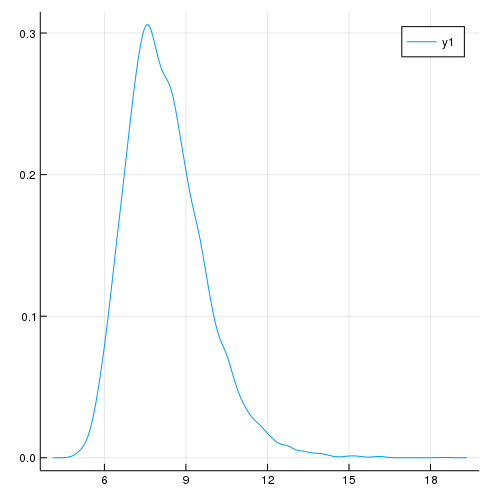

In [8]:
density(samples[:sigma])

End of `clip-21-23.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*